<a href="https://colab.research.google.com/github/nascript/natural-language-processing-NLP/blob/main/02_NLP_dasar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import requests
import string
import re # untuk regex

from bs4 import BeautifulSoup #untuk mengekstreak text pada HTML
import nltk #untuk processing technique pada NLP seperti melakukan bag of words, TF-IDF, Tokenization, stop words removal, stemming, lemmatization, topic modeling, word embeddings
from nltk.corpus import stopwords #untuk stop words bahasa indoensia bisa juga menggunakan library sastrawi berikut
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [15]:
# MEMBACA WEB UNTUK GET DATA

web = requests.get("https://pn-sleman.go.id/sipp").text
soup = BeautifulSoup(web)

for s in soup(['script', 'style']):
  s.decompose()

teks = ' '.join(soup.stripped_strings)
print(teks)

SIPP Sistem Informasi Penelusuran Perkara PENGADILAN NEGERI SLEMAN 520 Beranda Perdata Umum Perdata Gugatan Perdata Gugatan Sederhana Perdata Gugatan Bantahan Perdata Permohonan Perdata Khusus Hak Kekayaan Intelektual (HKI) Kepailitan & PKPU Pengadilan Hubungan Industrial (PHI) KPPU Pidana Pidana Biasa Pidana Singkat Pidana Cepat Pidana Pra Peradilan Perkara Lalu Lintas Pidana Khusus Pidana Anak Tindak Pidana Korupsi Pidana Perikanan Hak Asasi Manusia Jadwal Sidang Laporan Statistik Perkara Delegasi Delegasi Keluar Delegasi Masuk DATA SELURUH PERKARA Pembaharuan Data : Selasa, 06 Feb. 2024 09:00:21 WIB 
            , Total : 341.053 Perkara No Nomor Perkara Tanggal Register Klasifikasi Perkara Para Pihak Status Perkara Lama Proses Link 1 25/Pdt.G/2024/PN Smn 06 Feb 2024 Wanprestasi Penggugat:ENANG KUNCORO Tergugat:SILVIANA CANDRA PUSPITASARI Pendaftaran Perkara 9 Hari [ detil ] 2 26/Pdt.G/2024/PN Smn 06 Feb 2024 Ganti Rugi Penggugat:Piska Irtinawati Tergugat:Fitria Pendaftaran Perkara 

In [16]:
# 1. CLEANSING

# MANIPULASI STRING HURUF BESAR MENJADI HURUF KECIL SEMUA
teks = teks.lower()
teks = re.sub(r"\d+", "",teks)


teks = teks.translate(str.maketrans("", "", string.punctuation)) #menghapus tanda baca

teks = teks.strip() #menghapus kata kosong
print(teks)

sipp sistem informasi penelusuran perkara pengadilan negeri sleman  beranda perdata umum perdata gugatan perdata gugatan sederhana perdata gugatan bantahan perdata permohonan perdata khusus hak kekayaan intelektual hki kepailitan  pkpu pengadilan hubungan industrial phi kppu pidana pidana biasa pidana singkat pidana cepat pidana pra peradilan perkara lalu lintas pidana khusus pidana anak tindak pidana korupsi pidana perikanan hak asasi manusia jadwal sidang laporan statistik perkara delegasi delegasi keluar delegasi masuk data seluruh perkara pembaharuan data  selasa  feb   wib 
             total   perkara no nomor perkara tanggal register klasifikasi perkara para pihak status perkara lama proses link  pdtgpn smn  feb  wanprestasi penggugatenang kuncoro tergugatsilviana candra puspitasari pendaftaran perkara  hari  detil   pdtgpn smn  feb  ganti rugi penggugatpiska irtinawati tergugatfitria pendaftaran perkara  hari  detil   pdtppn smn  feb  permohonan pengangkatan anak pemohondisamar

In [17]:
# 2. STEMMING

# STEMMING (MERUBAH KATA MEJADI KATA DASAR)
factory = StemmerFactory()
stemmer = factory.create_stemmer()
output = stemmer.stem(teks)
print(output)

sipp sistem informasi telusur perkara adil negeri sleman beranda perdata umum perdata gugat perdata gugat sederhana perdata gugat bantah perdata mohon perdata khusus hak kaya intelektual hki pailit pkpu adil hubung industrial phi kppu pidana pidana biasa pidana singkat pidana cepat pidana pra adil perkara lalu lintas pidana khusus pidana anak tindak pidana korupsi pidana ikan hak asasi manusia jadwal sidang lapor statistik perkara delegasi delegasi keluar delegasi masuk data seluruh perkara baharu data selasa feb wib total perkara no nomor perkara tanggal register klasifikasi perkara para pihak status perkara lama proses link pdtgpn smn feb wanprestasi penggugatenang kuncoro tergugatsilviana candra puspitasari daftar perkara hari detil pdtgpn smn feb ganti rugi penggugatpiska irtinawati tergugatfitria daftar perkara hari detil pdtppn smn feb mohon angkat anak pemohondisamarkan sidang pertama hari detil pdtppn smn feb mohon ganti nama pemohonyuni puji rahayu sidang pertama hari detil pi

In [18]:
# 3. TOKENIZING
# merubah kedalam array

tokens = [t for t in output.split()]
print(tokens)

['sipp', 'sistem', 'informasi', 'telusur', 'perkara', 'adil', 'negeri', 'sleman', 'beranda', 'perdata', 'umum', 'perdata', 'gugat', 'perdata', 'gugat', 'sederhana', 'perdata', 'gugat', 'bantah', 'perdata', 'mohon', 'perdata', 'khusus', 'hak', 'kaya', 'intelektual', 'hki', 'pailit', 'pkpu', 'adil', 'hubung', 'industrial', 'phi', 'kppu', 'pidana', 'pidana', 'biasa', 'pidana', 'singkat', 'pidana', 'cepat', 'pidana', 'pra', 'adil', 'perkara', 'lalu', 'lintas', 'pidana', 'khusus', 'pidana', 'anak', 'tindak', 'pidana', 'korupsi', 'pidana', 'ikan', 'hak', 'asasi', 'manusia', 'jadwal', 'sidang', 'lapor', 'statistik', 'perkara', 'delegasi', 'delegasi', 'keluar', 'delegasi', 'masuk', 'data', 'seluruh', 'perkara', 'baharu', 'data', 'selasa', 'feb', 'wib', 'total', 'perkara', 'no', 'nomor', 'perkara', 'tanggal', 'register', 'klasifikasi', 'perkara', 'para', 'pihak', 'status', 'perkara', 'lama', 'proses', 'link', 'pdtgpn', 'smn', 'feb', 'wanprestasi', 'penggugatenang', 'kuncoro', 'tergugatsilviana'

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q
['sipp', 'sistem', 'informasi', 'telusur', 'perkara', 'adil', 'negeri', 'sleman', 'beranda', 'perdata', 'perdata', 'gugat', 'perdata', 'gugat', 'sederhana', 'perdata', 'gugat', 'bantah', 'perdata', 'mohon', 'perdata', 'khusus', 'hak', 'kaya', 'intelektual', 'hki', 'pailit', 'pkpu', 'adil', 'hubung', 'industrial', 'phi', 'kppu', 'pidana', 'pidana', 'pidana', 'singkat', 'pidana', 'cepat', 'pidana', 'pra', 'adil', 'perkara', 'lintas', 'pidana', 'khusus', 'pidana', 'anak', 'tindak', 'pidana', 'korupsi', 'pidana', 'ikan', 'hak', 'asasi', 'manusia', 'jadwal', 'sidang', 'lapor', 'statistik', 'perkara', 'delegasi', 'delegasi', 'delegasi', 'masuk', 'data', 'perkara', 'baharu', 'data', 'selasa', 'feb', 'wib', 'total', 'perkara', 'no', 'nomor', 'pe

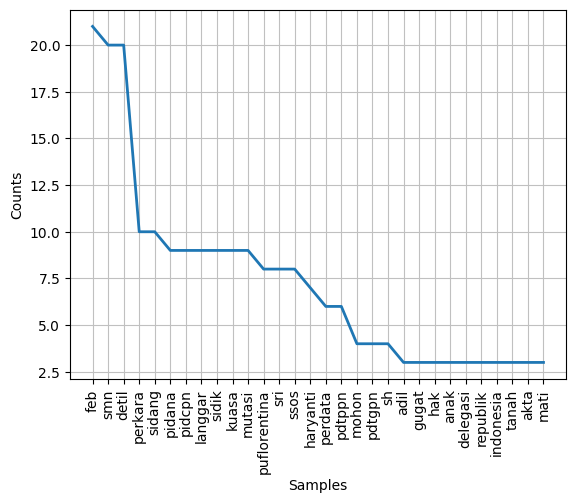

<Axes: xlabel='Samples', ylabel='Counts'>

In [22]:
# 4. STOP WORDS

nltk.download()
clean_tokens = tokens[:]
for token in tokens:
  if token in stopwords.words('indonesian'):
    clean_tokens.remove(token)

print(clean_tokens)

# 5. VISUALISASI

# FREKUENSI

freq = nltk.FreqDist(clean_tokens)
for key, val in freq.items():
  print(str(key) +  " " + str(val))


# PLOTTING
freq.plot(30)
